In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import quandl, math, datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [613]:
df = quandl.get('WIKI/GOOGL', authtoken='XL4Usxj7SnAMgqqgLKfk')

In [614]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [615]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]


In [616]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [617]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [618]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [619]:
forecast_col = 'Adj. Close'
df.fillna(-9999, inplace = True)

In [620]:
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

35


In [621]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [622]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume', 'label']]

In [623]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
df.dropna(inplace=True)

C:\Users\otbgo\AppData\Local\Temp/ipykernel_26996/1141208467.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['label'],1))


In [626]:
df.dropna(inplace=True)
y = np.array(df['label'])
y = y[0:len(X)]
print(y)

[  69.0782379    67.83941377   68.91272699 ... 1181.59       1119.2
 1068.76      ]


In [627]:
print(len(X), len(y))

3354 3354


In [628]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [644]:
clf = LinearRegression()
# clf.fit(X_train, y_train)
# with open('linearregression', 'wb') as f:
#     pickle.dump(clf, f)
    
pickle_in_clf = open('linearregression', 'rb')
clf = pickle.load(pickle_in_clf)
    
accuracy_clf = clf.score(X_test, y_test)

In [646]:
clf_svm = svm.SVR()
# clf_svm.fit(X_train, y_train)
# with open('svm', 'wb') as g:
#     pickle.dump(clf_svm, g)

pickle_in_svm = open('svm', 'rb')
clf_svm = pickle.load(pickle_in_svm)

accuracy_clf_svm = clf_svm.score(X_test, y_test)

In [647]:
print(accuracy_clf, accuracy_clf_svm)

0.9771258306676703 0.8013251817464985


In [632]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1083.47775846 1098.40620086 1112.24126111 1106.87558137 1100.39500588
 1097.67722416 1095.9607884  1092.91426383 1086.76615994 1082.35588692
 1079.98326208 1099.60999011 1118.23115324 1122.85244519 1137.85390607
 1141.88540368 1140.59722001 1137.95997915 1139.79796888 1158.38195104
 1157.81769064 1167.68146913 1164.28629427 1172.07573404 1192.52684903
 1205.16830715 1199.59756225 1211.41985928 1217.11371391 1215.18791747
 1205.87993811 1211.43401489 1210.22216764 1145.77224205 1092.21767319] 0.972046870878952 35


In [633]:
df['Forecast'] = np.nan

In [634]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [635]:
for i in (forecast_set):
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for j in range(len(df.columns)-1)] + [i]

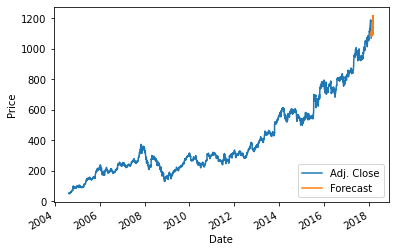

In [636]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [640]:
last_days = 100
df['Adj. Close End'] = df.iloc[-last_days:]['Adj. Close']

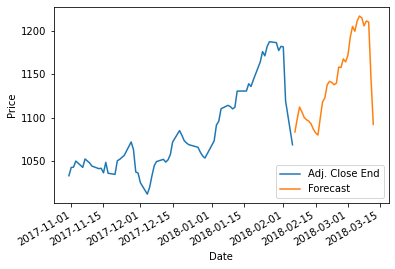

In [641]:
df['Adj. Close End'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()